# **Guadalajara**

# **1. Librerías a utilizar.**

In [1]:
!pip install mapclassify
!pip install libpysal
!pip install geopandas

In [2]:
!pip install fiona
!pip install rtree
!pip install pygeos

In [3]:
import fiona
import rtree
import pygeos

In [4]:
!pip install matplotlib

In [5]:
import numpy as np
import mapclassify
import pandas as pd
import libpysal as ps
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt


/srv/conda/envs/notebook/lib/python3.7/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [6]:
!pip install contextily

In [7]:
import matplotlib.patches as mpatches
import contextily as ctx

# **2. Importar las bases de datos, para revisar coordenadas y los datos que contienen.**

In [8]:
AGEBS= gpd.read_file('agebs_urbanas.shp')
print ('Forma de los datos:',AGEBS.shape)
AGEBS.head(5)

Forma de los datos: (2068, 6)


,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
0,1400200020219,14,002,0002,0219,"POLYGON ((2328998.333 938286.411, 2328992.454 ..."
1,1400200020045,14,002,0002,0045,"POLYGON ((2329856.497 937938.359, 2329843.636 ..."
2,1400200020172,14,002,0002,0172,"POLYGON ((2330222.579 938052.526, 2330204.500 ..."
3,1400200020261,14,002,0002,0261,"POLYGON ((2329372.664 937326.401, 2329230.982 ..."
4,1400200020149,14,002,0002,0149,"POLYGON ((2328663.851 938014.271, 2328701.766 ..."


In [9]:
AGEBS.crs

<Projected CRS: EPSG:6372>
Name: Mexico ITRF2008 / LCC
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Mexico - onshore and offshore.
- bounds: (-122.19, 12.1, -84.64, 32.72)
Coordinate Operation:
- name: Mexico LCC
- method: Lambert Conic Conformal (2SP)
Datum: Mexico ITRF2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## **Áreas verdes INEGI (2020)**


In [10]:
Area_Verde= gpd.read_file('AreasVerdes_gdl.shp')
Area_Verde.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CONDICION,GEOGRAFICO,NOMSERV,TIPO,CVE_SERV,AMBITO,geometry
0,140020002,14,002,0002,No Aplica,Camellón,Ninguno,Área Verde,3,Urbana,"POLYGON ((2329105.446 937918.412, 2329087.944 ..."
1,140020004,14,002,0004,No Aplica,Camellón,Ninguno,Área Verde,1,Urbana,"POLYGON ((2332663.551 936196.597, 2332759.901 ..."
2,140020001,14,002,0001,No Aplica,Camellón,Ninguno,Área Verde,1,Urbana,"POLYGON ((2334397.312 935139.204, 2334344.889 ..."
3,140020001,14,002,0001,No Aplica,Camellón,Ninguno,Área Verde,2,Urbana,"POLYGON ((2335130.753 936714.573, 2335126.174 ..."
4,140020001,14,002,0001,No Aplica,Camellón,Ninguno,Área Verde,3,Urbana,"POLYGON ((2334966.760 936876.256, 2334966.433 ..."


In [11]:
Area_Verde.crs

<Projected CRS: EPSG:6372>
Name: Mexico ITRF2008 / LCC
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Mexico - onshore and offshore.
- bounds: (-122.19, 12.1, -84.64, 32.72)
Coordinate Operation:
- name: Mexico LCC
- method: Lambert Conic Conformal (2SP)
Datum: Mexico ITRF2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

**Datos Pobreza**

In [12]:
Pobreza_ageb = pd.read_csv ('Pobreza_GDL_csv.csv')
Pobreza_ageb.head(5)

,cve_ent,nom_ent,cve_mun,nom_mun,cve_geo,cve_ageb,Rango_Pobreza,Rango_Pobreza_Ext
0,14,Jalisco,14001,Acatic,1400100010067,0067,"(34, 50]","[ 0, 20]"
1,14,Jalisco,14001,Acatic,1400100010071,0071,"(34, 50]","[ 0, 20]"
2,14,Jalisco,14001,Acatic,1400100010103,0103,"(34, 50]","[ 0, 20]"
3,14,Jalisco,14001,Acatic,1400100010118,0118,"(50, 70]","[ 0, 20]"
4,14,Jalisco,14001,Acatic,1400100010122,0122,"(34, 50]","[ 0, 20]"


# **3. Homologar bases de datos**

In [13]:
AGEBS= AGEBS.rename({'CVEGEO':'Clave_AGEB'}, axis=1)
Pobreza_ageb = Pobreza_ageb.rename({'cve_geo':'Clave_AGEB'}, axis=1)

In [14]:
Pobreza_ageb=Pobreza_ageb.dropna()

In [15]:
Pobreza_ageb['Min_RP'] = Pobreza_ageb.Rango_Pobreza.str.extract('(\d+)').astype(int)
Pobreza_ageb['Max_RP'] = Pobreza_ageb.Rango_Pobreza.str.extract('( \d+)').astype(int)
Pobreza_ageb['Pobreza_AV'] = ((Pobreza_ageb['Min_RP'] + Pobreza_ageb['Max_RP']) / 2)
Pobreza_ageb2 = Pobreza_ageb[['Clave_AGEB','nom_mun', 'Rango_Pobreza', 'Pobreza_AV' ]]

In [16]:
Pobreza_ageb2.set_index('Clave_AGEB')
AGEBS.set_index('Clave_AGEB')

,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
Clave_AGEB,,,,,
1400200020219,14,002,0002,0219,"POLYGON ((2328998.333 938286.411, 2328992.454 ..."
1400200020045,14,002,0002,0045,"POLYGON ((2329856.497 937938.359, 2329843.636 ..."
1400200020172,14,002,0002,0172,"POLYGON ((2330222.579 938052.526, 2330204.500 ..."
1400200020261,14,002,0002,0261,"POLYGON ((2329372.664 937326.401, 2329230.982 ..."
1400200020149,14,002,0002,0149,"POLYGON ((2328663.851 938014.271, 2328701.766 ..."
...,...,...,...,...,...
1412400010122,14,124,0001,0122,"POLYGON ((2389984.813 959214.947, 2389990.990 ..."
1412400010226,14,124,0001,0226,"POLYGON ((2391239.701 957658.792, 2391293.428 ..."
1412400010156,14,124,0001,0156,"POLYGON ((2389945.566 957216.321, 2389959.436 ..."


In [17]:
Pobreza_AGEB = AGEBS.merge(Pobreza_ageb2 ,left_on='Clave_AGEB', right_on='Clave_AGEB',how='left')
Pobreza_A = Pobreza_AGEB.copy()
print ('Forma de los datos:',Pobreza_AGEB.shape)
Pobreza_AGEB.head(50)

Forma de los datos: (2068, 9)


,Clave_AGEB,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry,nom_mun,Rango_Pobreza,Pobreza_AV
0,1400200020219,14,002,0002,0219,"POLYGON ((2328998.333 938286.411, 2328992.454 ...",Acatl�n de Ju�rez,"(50, 70]",60.0
1,1400200020045,14,002,0002,0045,"POLYGON ((2329856.497 937938.359, 2329843.636 ...",Acatl�n de Ju�rez,"(18, 34]",26.0
2,1400200020172,14,002,0002,0172,"POLYGON ((2330222.579 938052.526, 2330204.500 ...",NaN,NaN,NaN
3,1400200020261,14,002,0002,0261,"POLYGON ((2329372.664 937326.401, 2329230.982 ...",Acatl�n de Ju�rez,"(34, 50]",42.0
4,1400200020149,14,002,0002,0149,"POLYGON ((2328663.851 938014.271, 2328701.766 ...",Acatl�n de Ju�rez,"(34, 50]",42.0
5,1400200020242,14,002,0002,0242,"POLYGON ((2329757.289 937226.525, 2329780.028 ...",NaN,NaN,NaN
6,1400200020223,14,002,0002,0223,"POLYGON ((2329751.218 937234.063, 2329741.868 ...",Acatl�n de Ju�rez,"(50, 70]",60.0
7,1400200020327,14,002,0002,0327,"POLYGON ((2328715.082 938542.198, 2328745.425 ...",Acatl�n de Ju�rez,"(70, 100]",85.0
8,1400200020153,14,002,0002,0153,"POLYGON ((2329632.518 937215.672, 2329642.410 ...",NaN,NaN,NaN
9,1400200020257,14,002,0002,0257,"POLYGON ((2329478.421 936997.567, 2329466.579 ...",Acatl�n de Ju�rez,"(50, 70]",60.0


In [18]:
Pobreza_A = Pobreza_A.fillna(0)
Pobreza_A.head(50)

,Clave_AGEB,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry,nom_mun,Rango_Pobreza,Pobreza_AV
0,1400200020219,14,002,0002,0219,"POLYGON ((2328998.333 938286.411, 2328992.454 ...",Acatl�n de Ju�rez,"(50, 70]",60.0
1,1400200020045,14,002,0002,0045,"POLYGON ((2329856.497 937938.359, 2329843.636 ...",Acatl�n de Ju�rez,"(18, 34]",26.0
2,1400200020172,14,002,0002,0172,"POLYGON ((2330222.579 938052.526, 2330204.500 ...",0,0,0.0
3,1400200020261,14,002,0002,0261,"POLYGON ((2329372.664 937326.401, 2329230.982 ...",Acatl�n de Ju�rez,"(34, 50]",42.0
4,1400200020149,14,002,0002,0149,"POLYGON ((2328663.851 938014.271, 2328701.766 ...",Acatl�n de Ju�rez,"(34, 50]",42.0
5,1400200020242,14,002,0002,0242,"POLYGON ((2329757.289 937226.525, 2329780.028 ...",0,0,0.0
6,1400200020223,14,002,0002,0223,"POLYGON ((2329751.218 937234.063, 2329741.868 ...",Acatl�n de Ju�rez,"(50, 70]",60.0
7,1400200020327,14,002,0002,0327,"POLYGON ((2328715.082 938542.198, 2328745.425 ...",Acatl�n de Ju�rez,"(70, 100]",85.0
8,1400200020153,14,002,0002,0153,"POLYGON ((2329632.518 937215.672, 2329642.410 ...",0,0,0.0
9,1400200020257,14,002,0002,0257,"POLYGON ((2329478.421 936997.567, 2329466.579 ...",Acatl�n de Ju�rez,"(50, 70]",60.0


In [19]:
Pobreza_AGEB = Pobreza_AGEB.dropna()
Pobreza_AGEB.head()
print(Pobreza_A.shape)

(2068, 9)


In [20]:
Pobreza_A.crs

<Projected CRS: EPSG:6372>
Name: Mexico ITRF2008 / LCC
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Mexico - onshore and offshore.
- bounds: (-122.19, 12.1, -84.64, 32.72)
Coordinate Operation:
- name: Mexico LCC
- method: Lambert Conic Conformal (2SP)
Datum: Mexico ITRF2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [21]:
Pobreza_A=Pobreza_A.to_crs(epsg=3857)

In [22]:
mapclassify.NaturalBreaks(Pobreza_A['Pobreza_AV'].values, k=5)

NaturalBreaks         

   Interval      Count
----------------------
[ 0.00,  0.00] |   927
( 0.00, 26.00] |   454
(26.00, 42.00] |   420
(42.00, 60.00] |   233
(60.00, 85.00] |    34

## **Mapa de pobreza por agebs**

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  


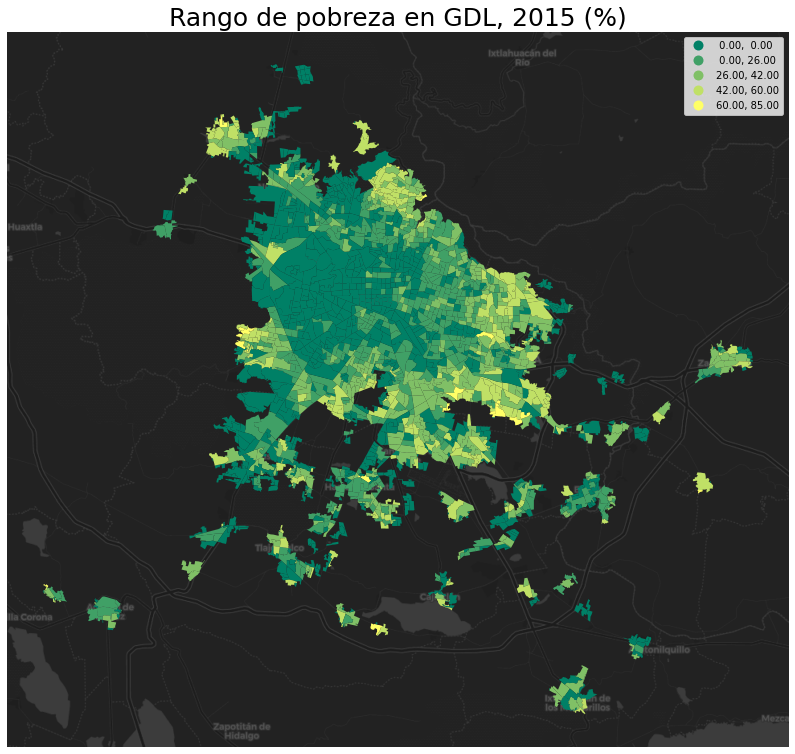

In [23]:
fig, ax = plt.subplots(figsize=(14, 16))
style = "dark_all"
cartodb_url = 'https://a.basemaps.cartocdn.com/%s/{z}/{x}/{y}.png' % style
Base = Pobreza_A.plot(column='Pobreza_AV', 
              alpha=1, 
              scheme='NaturalBreaks', 
              legend=True, 
              cmap='summer',
              classification_kwds={'k':5},
              figsize=(8,8),
              ax=ax)
plt.title("Rango de pobreza en GDL, 2015 (%)", size=25)
ax.set_axis_off() 
ctx.add_basemap(ax, alpha=0.9, url=cartodb_url)
plt.show()

In [24]:
Pobreza_AGEB=Pobreza_AGEB.to_crs(epsg=3857)

## **Mapa de pobreza con agebs de 2015**

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  


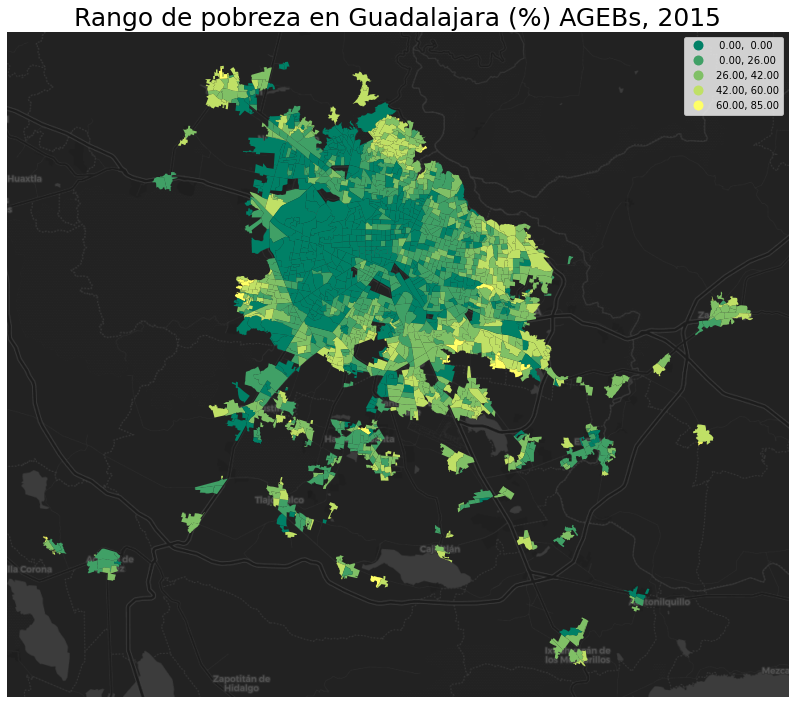

In [25]:
fig, ax = plt.subplots(figsize=(14, 16))
style = "dark_all"
cartodb_url = 'https://a.basemaps.cartocdn.com/%s/{z}/{x}/{y}.png' % style
Base = Pobreza_AGEB.plot(column='Pobreza_AV', 
              alpha=1, 
              scheme='NaturalBreaks', 
              legend=True, 
              cmap='summer',
              classification_kwds={'k':5},
              figsize=(8,8),
              ax=ax)
plt.title("Rango de pobreza en Guadalajara (%) AGEBs, 2015", size=25)
ax.set_axis_off() 
ctx.add_basemap(ax, alpha=0.9, url=cartodb_url) 
plt.show()

Importar OSM, para comparar las áreas verdes INEGI v.s. OSM

In [26]:
!pip install osmnx
import osmnx as osm

## **4. Descargar áreas verdes de OSM**

In [27]:
!pip install git+git://github.com/geopandas/geopandas.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-4r6zkipt
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-4r6zkipt


## **Todas las áreas verdes (sin discriminar a solamente parques)**

In [28]:
tags = {'leisure': True}
AreaV = osm.geometries_from_bbox(21.4863,19.8701, -102.7812, -103.8908, tags)

## **Solamente parques**

In [29]:
Parque= AreaV.drop(AreaV[AreaV['leisure']!='park'].index)
Parque.head(5)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


leisure                  name  \
element_type osmid                                      
node         2552012853    park       plaza municipal   
             6492709075    park         Lienzo Charro   
way          248412445     park       plaza municipal   
             444469270     park    cancha la estacion   
             444469271     park  cancha 2 la estacion   

                                                                  geometry  \
element_type osmid                                                           
node         2552012853                        POINT (-103.86195 20.08974)   
             6492709075                        POINT (-103.86166 20.08434)   
way          248412445   POLYGON ((-103.86216 20.08960, -103.86208 20.0...   
             444469270   POLYGON ((-103.56897 20.23401, -103.56814 20.2...   
             444469271   POLYGON ((-103.57018 20.23452, -103.56926 20.2...   

                        source  \
element_type osmid               
node         2552012853    NaN   
             6492709075    OSM   
way          248412445     NaN   
             444469270    Bing   
             444469271    Bing   

                                                                     nodes  \
element_type osmid                                                           
node         2552012853                                                NaN   
             6492709075                                                NaN   
way          248412445   [2552012854, 2552012855, 2552012856, 255201285...   
             444469270   [4419491452, 4419491449, 4419491445, 441949144...   
             444469271   [4419491455, 4419491453, 4419491448, 441949145...   

                        sport access surface hoops description  ... cycling  \
element_type osmid                                              ...           
node         2552012853   NaN    NaN     NaN   NaN         NaN  ...     NaN   
             6492709075   NaN    NaN     NaN   NaN         NaN  ...     NaN   
way          248412445    NaN    NaN     NaN   NaN         NaN  ...     NaN   
             444469270    NaN    NaN     NaN   NaN         NaN  ...     NaN   
             444469271    NaN    NaN     NaN   NaN         NaN  ...     NaN   

                        addr:full water blind playground:theme bicycle foot  \
element_type osmid                                                            
node         2552012853       NaN   NaN   NaN              NaN     NaN  NaN   
             6492709075       NaN   NaN   NaN              NaN     NaN  NaN   
way          248412445        NaN   NaN   NaN              NaN     NaN  NaN   
             444469270        NaN   NaN   NaN              NaN     NaN  NaN   
             444469271        NaN   NaN   NaN              NaN     NaN  NaN   

                        horse motor_vehicle operator:type  
element_type osmid                                         
node         2552012853   NaN           NaN           NaN  
             6492709075   NaN           NaN           NaN  
way          248412445    NaN           NaN           NaN  
             444469270    NaN           NaN           NaN  
             444469271    NaN           NaN           NaN  

[5 rows x 102 columns]

In [30]:
#Parque.set_index('osmid')

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
Parque.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [32]:
Parque=Parque.to_crs(epsg=6372)
Parque.head()

leisure                  name  \
element_type osmid                                      
node         2552012853    park       plaza municipal   
             6492709075    park         Lienzo Charro   
way          248412445     park       plaza municipal   
             444469270     park    cancha la estacion   
             444469271     park  cancha 2 la estacion   

                                                                  geometry  \
element_type osmid                                                           
node         2552012853                     POINT (2305981.395 899822.842)   
             6492709075                     POINT (2306004.021 899227.262)   
way          248412445   POLYGON ((2305959.328 899807.972, 2305968.678 ...   
             444469270   POLYGON ((2336682.801 915368.731, 2336769.154 ...   
             444469271   POLYGON ((2336557.506 915426.727, 2336652.808 ...   

                        source  \
element_type osmid               
node         2552012853    NaN   
             6492709075    OSM   
way          248412445     NaN   
             444469270    Bing   
             444469271    Bing   

                                                                     nodes  \
element_type osmid                                                           
node         2552012853                                                NaN   
             6492709075                                                NaN   
way          248412445   [2552012854, 2552012855, 2552012856, 255201285...   
             444469270   [4419491452, 4419491449, 4419491445, 441949144...   
             444469271   [4419491455, 4419491453, 4419491448, 441949145...   

                        sport access surface hoops description  ... cycling  \
element_type osmid                                              ...           
node         2552012853   NaN    NaN     NaN   NaN         NaN  ...     NaN   
             6492709075   NaN    NaN     NaN   NaN         NaN  ...     NaN   
way          248412445    NaN    NaN     NaN   NaN         NaN  ...     NaN   
             444469270    NaN    NaN     NaN   NaN         NaN  ...     NaN   
             444469271    NaN    NaN     NaN   NaN         NaN  ...     NaN   

                        addr:full water blind playground:theme bicycle foot  \
element_type osmid                                                            
node         2552012853       NaN   NaN   NaN              NaN     NaN  NaN   
             6492709075       NaN   NaN   NaN              NaN     NaN  NaN   
way          248412445        NaN   NaN   NaN              NaN     NaN  NaN   
             444469270        NaN   NaN   NaN              NaN     NaN  NaN   
             444469271        NaN   NaN   NaN              NaN     NaN  NaN   

                        horse motor_vehicle operator:type  
element_type osmid                                         
node         2552012853   NaN           NaN           NaN  
             6492709075   NaN           NaN           NaN  
way          248412445    NaN           NaN           NaN  
             444469270    NaN           NaN           NaN  
             444469271    NaN           NaN           NaN  

[5 rows x 102 columns]

## **Parques de INEGI**

In [33]:
colors = ['#A1E2E6', '#E6BDA1', '#B3A16B', '#678072', '#524A4A']

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


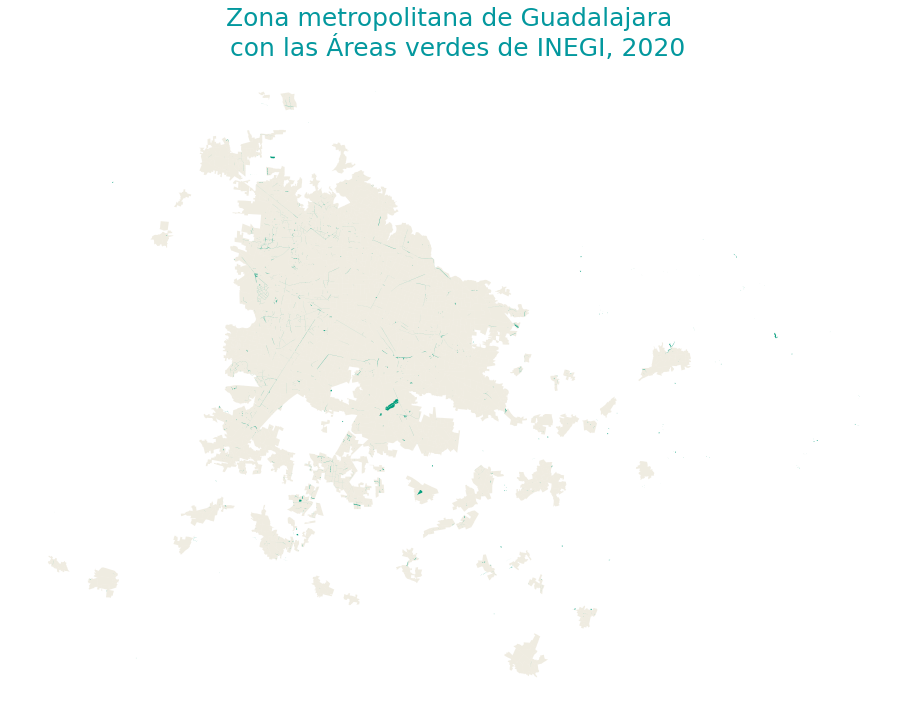

In [34]:
Parques_Toluca= AGEBS.plot(color= colors[2], alpha=.2, figsize=(16,18))
Area_Verde.plot(ax=Parques_Toluca, color= '#039e7d',linewidth= 1.5)
plt.title("Zona metropolitana de Guadalajara \n con las Áreas verdes de INEGI, 2020", fontsize=25, color= '#03989e')
plt.axis('off')
plt.show()

## **Parques OSM**

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


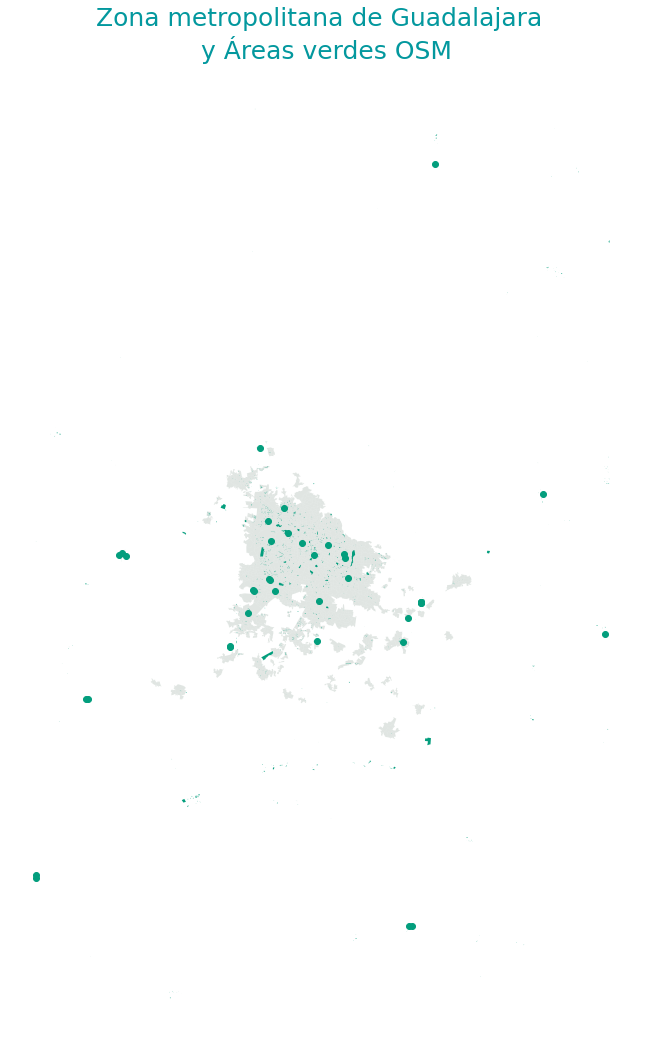

In [35]:
Parques_Tol_OSM= AGEBS.plot(color=colors[3], alpha=0.2, figsize=(16,18))
Parque.plot(ax=Parques_Tol_OSM, color= '#039e7d')
plt.title("Zona metropolitana de Guadalajara \n y Áreas verdes OSM", fontsize=25, color= '#03989e')
plt.axis('off')
plt.show()

In [36]:
Parque.crs

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Projected CRS: EPSG:6372>
Name: Mexico ITRF2008 / LCC
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Mexico - onshore and offshore.
- bounds: (-122.19, 12.1, -84.64, 32.72)
Coordinate Operation:
- name: Mexico LCC
- method: Lambert Conic Conformal (2SP)
Datum: Mexico ITRF2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [37]:
AGEBS.crs

<Projected CRS: EPSG:6372>
Name: Mexico ITRF2008 / LCC
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Mexico - onshore and offshore.
- bounds: (-122.19, 12.1, -84.64, 32.72)
Coordinate Operation:
- name: Mexico LCC
- method: Lambert Conic Conformal (2SP)
Datum: Mexico ITRF2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [38]:
Parque_Clip = gpd.clip(Parque, AGEBS)
Parque_Clip.head()

leisure                                  name  \
element_type osmid                                                     
way          429181823    park                 Club Deportivo Juarez   
             900149806    park  Plaza Municipal de Acatlán de Juárez   
             466225603    park   Plaza Principal Venta del Astillero   
             466282361    park                        Plaza Nextipac   
             829874164    park                   Terraza Coto Albano   

                                                                 geometry  \
element_type osmid                                                          
way          429181823  POLYGON ((2334402.902 936203.764, 2334390.275 ...   
             900149806  POLYGON ((2334566.302 936161.038, 2334562.802 ...   
             466225603  POLYGON ((2339830.442 969871.542, 2339844.579 ...   
             466282361  POLYGON ((2341725.974 974137.373, 2341759.196 ...   
             829874164  POLYGON ((2339728.083 970915.016, 2339720.781 ...   

                       source  \
element_type osmid              
way          429181823    NaN   
             900149806    NaN   
             466225603    NaN   
             466282361    NaN   
             829874164    NaN   

                                                                    nodes  \
element_type osmid                                                          
way          429181823  [4283089603, 4283089604, 4283089605, 428308960...   
             900149806  [8362609885, 8362609886, 8362609887, 836260988...   
             466225603  [4610843248, 4610843249, 4610843250, 461084326...   
             466282361  [8410595815, 8410598817, 8410598819, 841059881...   
             829874164  [7745459036, 6304257783, 6304258287, 774545903...   

                       sport access surface hoops description  ... cycling  \
element_type osmid                                             ...           
way          429181823   NaN    NaN     NaN   NaN         NaN  ...     NaN   
             900149806   NaN    NaN     NaN   NaN         NaN  ...     NaN   
             466225603   NaN    NaN     NaN   NaN         NaN  ...     NaN   
             466282361   NaN    NaN     NaN   NaN         NaN  ...     NaN   
             829874164   NaN    NaN     NaN   NaN         NaN  ...     NaN   

                       addr:full water blind playground:theme bicycle foot  \
element_type osmid                                                           
way          429181823       NaN   NaN   NaN              NaN     NaN  NaN   
             900149806       NaN   NaN   NaN              NaN     NaN  NaN   
             466225603       NaN   NaN   NaN              NaN     NaN  NaN   
             466282361       NaN   NaN   NaN              NaN     NaN  NaN   
             829874164       NaN   NaN   NaN              NaN     NaN  NaN   

                       horse motor_vehicle operator:type  
element_type osmid                                        
way          429181823   NaN           NaN           NaN  
             900149806   NaN           NaN           NaN  
             466225603   NaN           NaN           NaN  
             466282361   NaN           NaN           NaN  
             829874164   NaN           NaN           NaN  

[5 rows x 102 columns]

## **Parques OSM, solamente de la zona metropolitana**

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


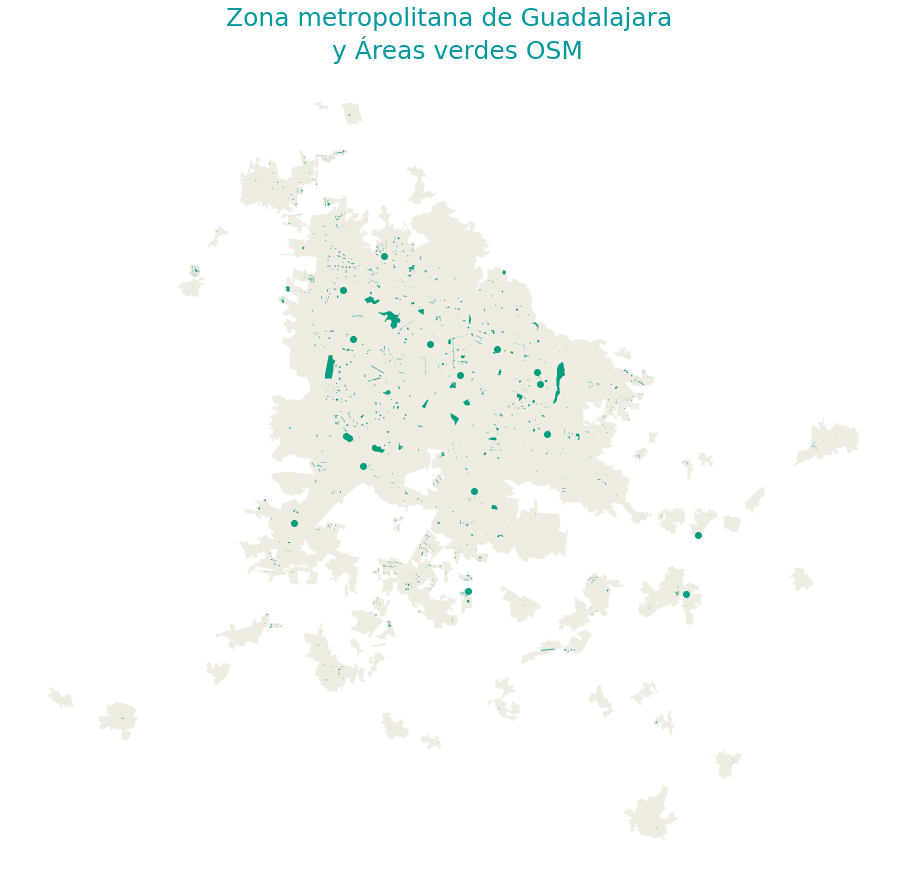

In [39]:
Parques_Tol_OSM2= AGEBS.plot(color=colors[2], alpha=0.2, figsize=(16,18))
Parque_Clip.plot(ax=Parques_Tol_OSM2, color='#039e7d')
plt.title("Zona metropolitana de Guadalajara \n y Áreas verdes OSM", fontsize=25, color= '#03989e')
plt.axis('off')
plt.show()

In [40]:
AreaV.crs

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [41]:
AreaV_INEGI=Area_Verde.to_crs(epsg=3857)
AreaV_OSM=Parque_Clip.to_crs(epsg=3857)

## **Pobreza por ageb (Coneval, 2015)**

Parques INEGI y AGEBs clasificados por rango de pobreza

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  from ipykernel import kernelapp as app


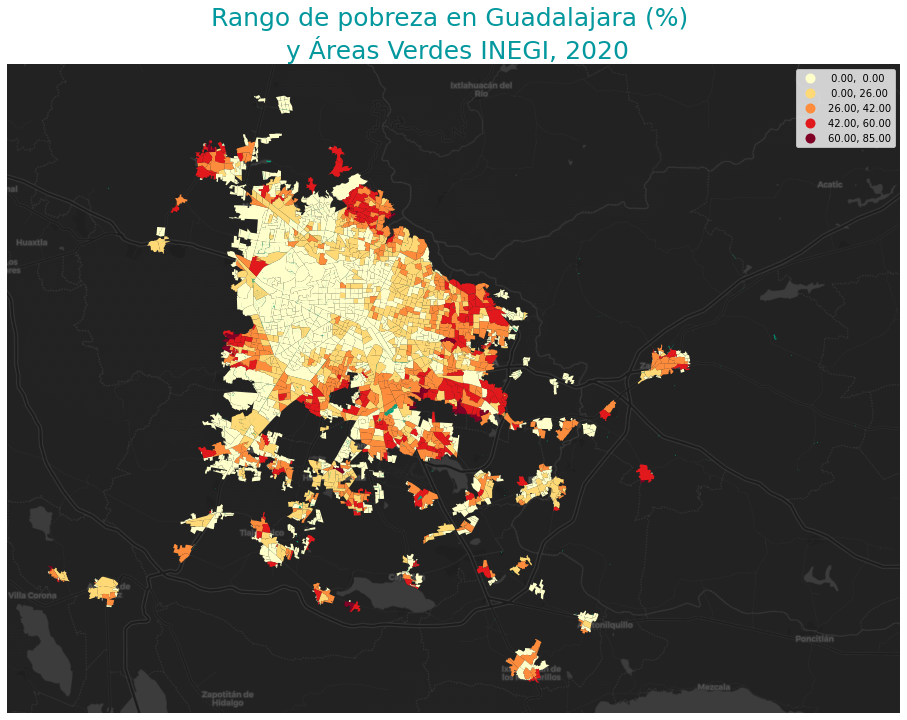

In [42]:
fig, ax = plt.subplots(figsize=(16, 18))
style = "dark_all"
cartodb_url = 'https://a.basemaps.cartocdn.com/%s/{z}/{x}/{y}.png' % style
Base = Pobreza_A.plot(column='Pobreza_AV',  
              alpha=1, 
              scheme='NaturalBreaks', 
              legend=True, 
              cmap='YlOrRd',
              classification_kwds={'k':5},
              figsize=(8,8),
              ax=ax)
AreaV_INEGI.plot(ax=Base, color='#039e7d')
plt.title("Rango de pobreza en Guadalajara (%) \n y Áreas Verdes INEGI, 2020", fontsize=25, color = '#03989e')
ax.set_axis_off() 
ctx.add_basemap(ax, alpha=0.9, url=cartodb_url) 
plt.show()

## **Parques INEGI y AGEBs 2015 clasificados por rango de pobreza**

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  from ipykernel import kernelapp as app


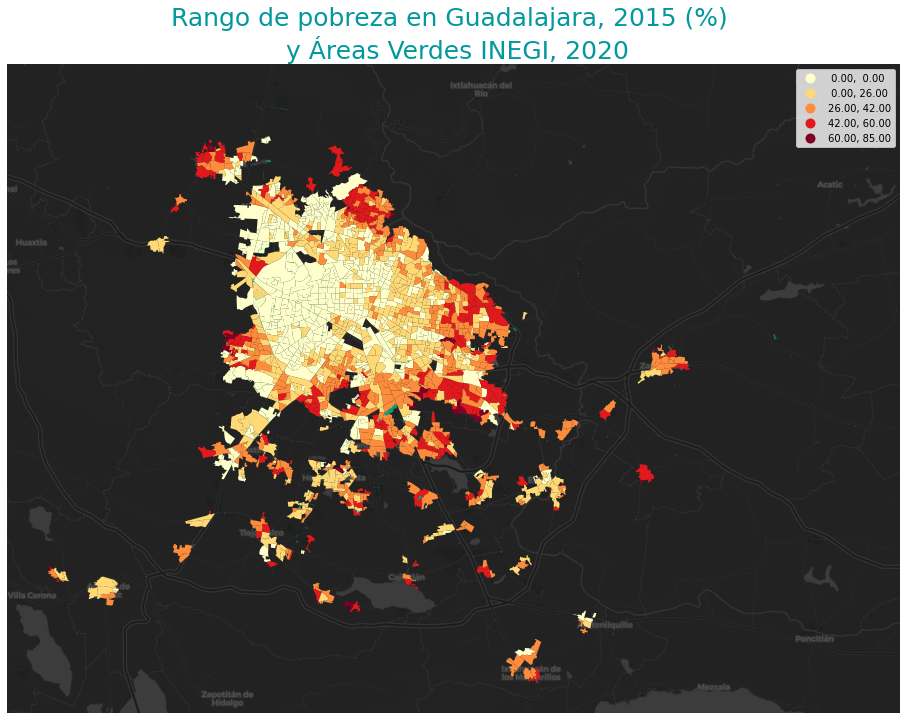

In [43]:
fig, ax = plt.subplots(figsize=(16, 18))
style = "dark_all"
cartodb_url = 'https://a.basemaps.cartocdn.com/%s/{z}/{x}/{y}.png' % style
Base = Pobreza_AGEB.plot(column='Pobreza_AV',  
              alpha=1, 
              scheme='NaturalBreaks', 
              legend=True, 
              cmap='YlOrRd',
              classification_kwds={'k':5},
              figsize=(8,8),
              ax=ax)
AreaV_INEGI.plot(ax=Base, color='#039e7d')
plt.title("Rango de pobreza en Guadalajara, 2015 (%) \n y Áreas Verdes INEGI, 2020", fontsize=25, color = '#03989e')
ax.set_axis_off() 
ctx.add_basemap(ax, alpha=0.9, url=cartodb_url) 
plt.show()


# **Parques OSM y AGEBs clasificados por Rango de Pobreza**

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  from ipykernel import kernelapp as app


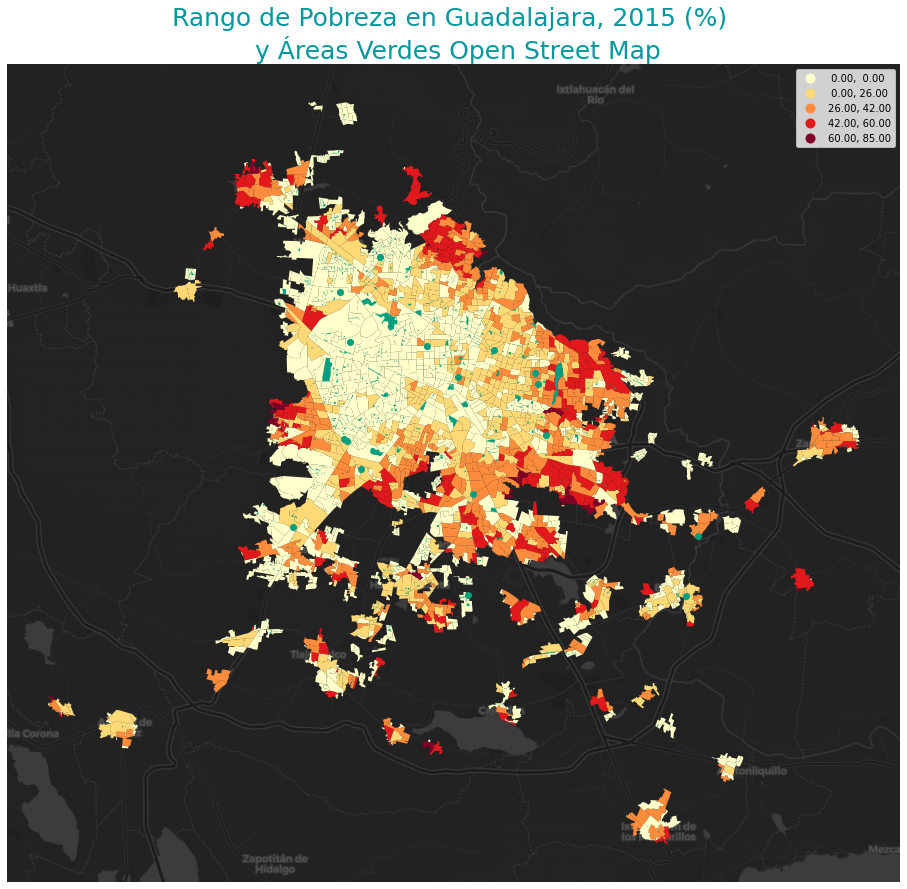

In [44]:
fig, ax = plt.subplots(figsize=(16, 18))
style = "dark_all"
cartodb_url = 'https://a.basemaps.cartocdn.com/%s/{z}/{x}/{y}.png' % style
Base = Pobreza_A.plot(column='Pobreza_AV',  
              alpha=1, 
              scheme='NaturalBreaks', 
              legend=True, 
              cmap='YlOrRd',
              classification_kwds={'k':5},
              figsize=(8,8),
              ax=ax)
AreaV_OSM.plot(ax=Base, color='#039e7d')
plt.title("Rango de Pobreza en Guadalajara, 2015 (%) \n y Áreas Verdes Open Street Map", fontsize=25, color = '#03989e')
ax.set_axis_off() 
ctx.add_basemap(ax, alpha=0.9, url=cartodb_url) 
plt.show()


## **Parques OSM y AGEBs 2015 clasificados por Rango de Pobreza**

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  from ipykernel import kernelapp as app


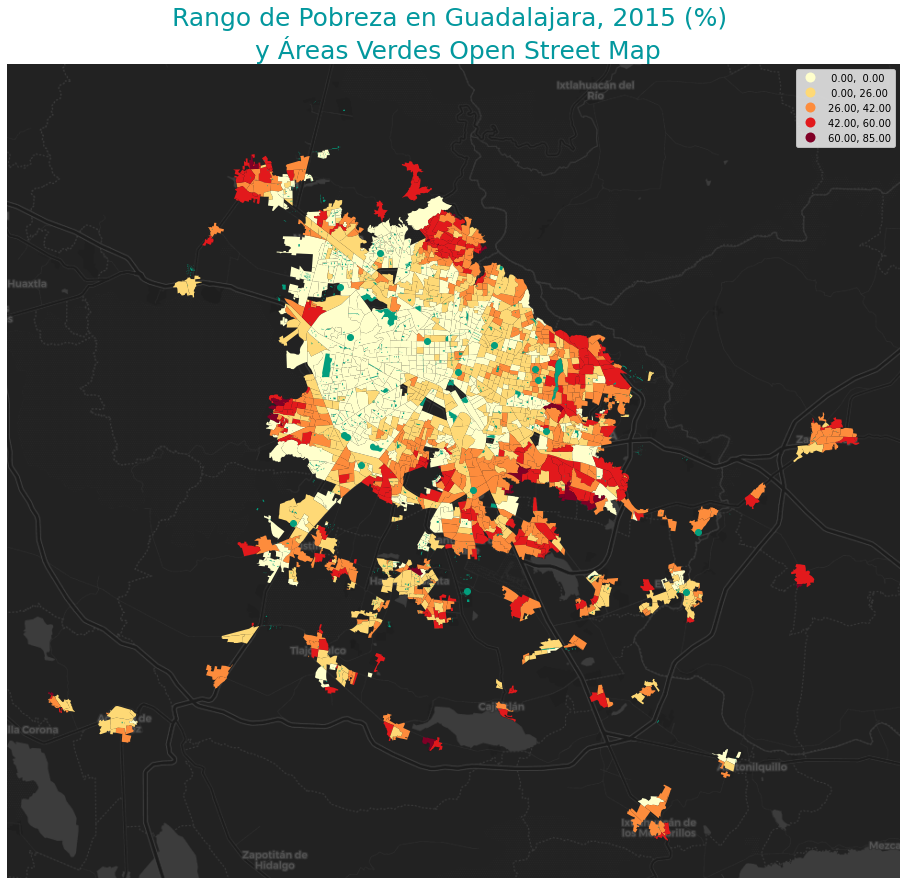

In [45]:
fig, ax = plt.subplots(figsize=(16, 18))
style = "dark_all"
cartodb_url = 'https://a.basemaps.cartocdn.com/%s/{z}/{x}/{y}.png' % style
Base = Pobreza_AGEB.plot(column='Pobreza_AV',  
              alpha=1, 
              scheme='NaturalBreaks', 
              legend=True, 
              cmap='YlOrRd',
              classification_kwds={'k':5},
              figsize=(8,8),
              ax=ax)
AreaV_OSM.plot(ax=Base, color='#039e7d')
plt.title("Rango de Pobreza en Guadalajara, 2015 (%) \n y Áreas Verdes Open Street Map", fontsize=25, color = '#03989e')
ax.set_axis_off() 
ctx.add_basemap(ax, alpha=0.9, url=cartodb_url) 
plt.show()

# **5. Cálculo de centroides de AGEBs, Áreas Verdes de INEGI y Áreas Verdes de OSM**

In [ ]:
import warnings
import numpy as np
import pandas as pd

from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
!pip install access
from access import Access, weights, Datasets

In [ ]:
Centroide_AGEB1 = Pobreza_A.copy()
Centroide_AGEB1 = Centroide_AGEB1.reset_index()
Centroide_AGEB1 = Centroide_AGEB1[['Clave_AGEB', 'geometry', 'Pobreza_AV']]
Centroide_AGEB1['geometry'] = Centroide_AGEB1.to_crs(6372).centroid
centroides = Centroide_AGEB1.to_crs(6372).centroid
coordenadas = np.array([(pt.x , pt.y) for pt in centroides])
Centroide_AGEB1['X_O']=coordenadas[:,0]/1000
Centroide_AGEB1['Y_O']=coordenadas[:,1]/1000
Centroide_AGEB1.head(2)

In [ ]:
AGEBS_centro= AGEBS.plot(color=colors[2], alpha=0.2, figsize=(16,18))
Centroide_AGEB1.plot(ax=AGEBS_centro, color='#039e7d')
plt.title("Centroides de AGEBs (todas)", fontsize=25, color= '#03989e')
plt.axis('off')
plt.show()

In [ ]:
Centroide_AGEB = Pobreza_AGEB.copy()
Centroide_AGEB = Centroide_AGEB.reset_index()
Centroide_AGEB = Centroide_AGEB[['Clave_AGEB', 'geometry', 'Pobreza_AV']]
Centroide_AGEB['geometry'] = Centroide_AGEB.to_crs(6372).centroid
centroides = Centroide_AGEB.to_crs(6372).centroid
coordenadas = np.array([(pt.x , pt.y) for pt in centroides])
Centroide_AGEB['X_O']=coordenadas[:,0]/1000
Centroide_AGEB['Y_O']=coordenadas[:,1]/1000
Centroide_AGEB.head(2)

In [ ]:
AGEBS_centro= AGEBS.plot(color=colors[2], alpha=0.2, figsize=(16,18))
Centroide_AGEB.plot(ax=AGEBS_centro, color='#039e7d')
plt.title("Centroides de AGEBs (2015)", fontsize=25, color= '#03989e')
plt.axis('off')
plt.show()

In [ ]:
Centro_Area_Inegi = AreaV_INEGI.copy()
Centro_Area_Inegi = Centro_Area_Inegi.reset_index()
Centro_Area_Inegi = Centro_Area_Inegi[['CVEGEO', 'geometry', 'TIPO']]
Centro_Area_Inegi['geometry'] = Centro_Area_Inegi.to_crs(6372).centroid
centroides = Centro_Area_Inegi.to_crs(6372).centroid
coordenadas = np.array([(pt.x , pt.y) for pt in centroides])
Centro_Area_Inegi['X_D']=coordenadas[:,0]/1000
Centro_Area_Inegi['Y_D']=coordenadas[:,1]/1000
Centro_Area_Inegi.head(2)

In [ ]:
INEGI_centro= AGEBS.plot(color=colors[2], alpha=0.2, figsize=(18,20))
Centro_Area_Inegi.plot(ax=INEGI_centro, color='#039e7d')
plt.title("Centroides de parques INEGI, 2020", fontsize=25, color= '#03989e')
plt.axis('off')
plt.show()

In [ ]:
OSM_Ce = AreaV_OSM.copy()
OSM_Ce['geometry'] = OSM_Ce.to_crs(6372).centroid
centroides = OSM_Ce.to_crs(6372).centroid
coordenadas = np.array([(pt.x , pt.y) for pt in centroides])
OSM_Ce['X_D']=coordenadas[:,0]/1000
OSM_Ce['Y_D']=coordenadas[:,1]/1000
OSM_Ce.head(2)

In [ ]:
#OSM_Ce.set_index('osmid')

In [ ]:
OSM_centro= AGEBS.plot(color=colors[2], alpha=0.2, figsize=(16,18))
OSM_Ce.plot(ax=OSM_centro, color='#039e7d')
plt.title("Centroides de parques Open Street Map", fontsize=25, color= '#03989e')
plt.axis('off')
plt.show()

#**6. Cálculo de la distancia entre centroides de Agebs y centroides de áreas verdes (INEGI)**

In [ ]:
dist_matrix = (euclidean_distances(Centroide_AGEB[['Y_O','X_O']], 
                              Centro_Area_Inegi[['Y_D','X_D']]))

In [ ]:
df_dist_matrix = (pd.DataFrame(dist_matrix,index=Centroide_AGEB['Clave_AGEB'], 
                 columns=Centro_Area_Inegi['CVEGEO']))
df_dist_matrix.head(2)

In [ ]:
df_dist_long = (pd.melt(df_dist_matrix.reset_index(),id_vars='Clave_AGEB'))
df_dist_long = df_dist_long.rename(columns={'value':'Distancia'})
Matriz_Dist_INEGI= df_dist_long.rename({'Clave_AGEB':'Origen','CVEGEO': 'Destino'}, axis=1)
Matriz_Dist_INEGI.head(2)

# **7. Cálculo de la accesibilidad a áreas verdes (INEGI) con el Modelo Gravitacional**

In [ ]:
Spatial_Access_INEGI = Access(demand_df    = Centroide_AGEB, 
                              demand_index = 'Clave_AGEB', 
                              demand_value = 'Pobreza_AV',
                              supply_df    = Centro_Area_Inegi, 
                              supply_index = 'CVEGEO',
                              cost_df      = Matriz_Dist_INEGI, 
                              cost_origin  = 'Origen', 
                              cost_dest    = 'Destino',
                              cost_name    = 'Distancia')

In [ ]:
Model_grav = weights.gravity(scale = 1, alpha = -2, min_dist = 0.5)

Gravity_Weigh = Spatial_Access_INEGI.weighted_catchment(name = "Gravity", weight_fn = Model_grav)

In [ ]:
Grav_value = Gravity_Weigh.copy().reset_index()
Spatial_Access_I= Pobreza_AGEB.merge(Grav_value ,left_on='Clave_AGEB', right_on='Clave_AGEB',how='left')

In [ ]:
Pobreza_AGEB=Pobreza_AGEB.to_crs(epsg = 3857)
Pobreza_A=Pobreza_A.to_crs(epsg = 3857)
AreaV_INEGI=AreaV_INEGI.to_crs(epsg = 3857)
Spatial_Access_I=Spatial_Access_I.to_crs(epsg = 3857)

In [ ]:
Spatial_Access_I.head()

In [ ]:
Spatial_Access_I.info()

In [ ]:
Spatial_Access_I['Pobreza_AV']= Spatial_Access_I.Pobre_AV.astype(int)

In [ ]:
Spatial_Access_I['Gravity_value']= Spatial_Access_I.Gravity_value.astype(int)

In [ ]:
import datetime
from os import listdir
from os.path import isfile, join
import glob
import re
import seaborn as sns

##**8. Estandarización de variables**

In [ ]:
Spatial_Access_I['Std_Pobreza'] = (Spatial_Access_I['Pobreza_AV'] - Spatial_Access_I['Pobreza_AV'].mean()) / Spatial_Access_I['Pobreza_AV'].std()

In [ ]:
Spatial_Access_I['Std_Access'] = (Spatial_Access_I['Gravity_value'] - Spatial_Access_I['Gravity_value'].mean()) / Spatial_Access_I['Gravity_value'].std()

##**Diagramas para ver la relación entre la pobreza y la accesibilidad a áreas verdes (INEGI)**

In [ ]:
h=sns.jointplot(data=Spatial_Access_I, x = Spatial_Access_I['Std_Pobreza'], y = Spatial_Access_I['Std_Access'],color = '#618A98', kind = 'reg')
h.fig.suptitle("Diagrama Pobreza-Accesibilidad", alpha = 0.5, fontsize=20, color='#03989e')
h.set_axis_labels('Pobreza por AGEB','Accesibilidad a áreas verdes',fontsize=15, alpha = 0.5, color='#03989e')
plt.axvline(0, c = 'grey', alpha = 0.5)
plt.axhline(0, c = 'grey', alpha = 0.5)
h.fig.subplots_adjust(top=0.90)
plt.show()

In [ ]:
plt.subplots(1,figsize=(10,5))
ax= sns.regplot(data=Spatial_Access_I, x = Spatial_Access_I['Std_Pobreza'], y = Spatial_Access_I['Std_Access'],scatter_kws={"color": "#F9DA95"}, line_kws={"color": "#618A98"})
sns.set_style('ticks')
ax.axes.set_title("Scatter Pobreza-Accesibilidad", alpha = 0.5, fontsize=20, color='#03989e')
ax.set_xlabel("Pobreza",fontsize=15, alpha = 0.5, color='#03989e')
ax.set_ylabel("Accesibilidad \n a áreas verdes",fontsize=15, alpha = 0.5, color='#03989e')
plt.axvline(0, c = 'grey', alpha = 0.5)
plt.axhline(0, c = 'grey', alpha = 0.5)
plt.show()

In [ ]:
fig , filas = plt.subplots(1,2, figsize=(50,15))
for ax in filas: 
    if (ax==filas[0]):
        sns.kdeplot(Spatial_Access_I['Std_Access'], shade = True, color= "#F9DA95", ax=ax)
    elif (ax==filas[1]):
        sns.kdeplot(Spatial_Access_I['Std_Pobreza'], shade = True, color= "#618A98", ax=ax)

##**Mapa de accesibilidad a áreas verdes (INEGI)**

In [ ]:
Base = Spatial_Access_I.plot(column='Std_Access', 
              alpha=0.8, 
              scheme='NaturalBreaks', 
              legend=True, 
              cmap='viridis',
              classification_kwds={'k':5},
              figsize=(15,15))
AreaV_INEGI.plot(ax=Base, color='#00B464')
plt.title("Accesibilidad espacial \n áreas verdes INEGI", fontsize=20, color= '#03989e')
plt.axis('off')
plt.show()

#**9. Cálculo de la distancia entre centroides de Agebs y centroides de áreas verdes (OSM)**

In [ ]:
dist_matrix2 = (euclidean_distances(Centroide_AGEB[['Y_O','X_O']], 
                              OSM_Ce[['Y_D','X_D']]))

In [ ]:
df_dist_matrix2 = (pd.DataFrame(dist_matrix2,index=Centroide_AGEB['Clave_AGEB'], 
                 columns=OSM_Ce['osmid']))
df_dist_matrix2.head(2)

In [ ]:
df_dist_long2 = (pd.melt(df_dist_matrix2.reset_index(),id_vars='Clave_AGEB'))
df_dist_long2 = df_dist_long2.rename(columns={'value':'Distancia'})
Matriz_Dist2= df_dist_long2.rename({'Clave_AGEB':'Origen','osmid': 'Destino'}, axis=1)
Matriz_Dist2.head(2)

#**10. Cálculo de la accesibilidad a áreas verdes (OSM) con el Modelo Gravitacional**

In [ ]:
Spatial_Access_data2= Access(demand_df    = Centroide_AGEB, 
                              demand_index = 'Clave_AGEB', 
                              demand_value = 'Pobreza_AV',
                              supply_df    = OSM_Ce, 
                              supply_index = 'osmid',
                              cost_df      = Matriz_Dist2, 
                              cost_origin  = 'Origen', 
                              cost_dest    = 'Destino',
                              cost_name    = 'Distancia')

In [ ]:
Model_grav2 = weights.gravity(scale = 1, alpha = -2, min_dist = 0.5)

Gravity_Weigh2 = Spatial_Access_data2.weighted_catchment(name = "Gravity", weight_fn = Model_grav2)

In [ ]:
Grav_value2 = Gravity_Weigh2.copy().reset_index()
Spatial_Access2 = Pobreza_AGEB.merge(Grav_value2 ,left_on='Clave_AGEB', right_on='Clave_AGEB',how='left')

In [ ]:
Spatial_Access2.head()

##**Mapa de accesibilidad a áreas verdes (OSM)**

In [ ]:
Base = Spatial_Access2.plot(column='Gravity_value', 
              alpha=0.8, 
              scheme='NaturalBreaks', 
              legend=True, 
              cmap='viridis',
              classification_kwds={'k':5},
              figsize=(15,15))
AreaV_OSM.plot(ax=Base, color='#00B464')
plt.title("Accesibilidad espacial \n áreas verdes OSM", fontsize=20, color= '#03989e')
plt.axis('off')
plt.show()

##**11. Estandarización de variables**

In [ ]:
Spatial_Access2['Std_Pobreza'] = (Spatial_Access2['Pobreza_AV'] - Spatial_Access2['Pobreza_AV'].mean()) / Spatial_Access2['Pobreza_AV'].std()

In [ ]:
Spatial_Access2['Std_Access'] = (Spatial_Access2['Gravity_value'] - Spatial_Access2['Gravity_value'].mean()) / Spatial_Access2['Gravity_value'].std()

##**Diagramas para ver la relación entre la pobreza y la accesibilidad a áreas verdes (OSM)**

In [ ]:
h=sns.jointplot(data=Spatial_Access2, x = Spatial_Access2['Std_Pobreza'], y = Spatial_Access2['Std_Access'],color = '#618A98', kind = 'reg')
h.fig.suptitle("Diagrama Pobreza-Accesibilidad", alpha = 0.5, fontsize=20, color='#03989e')
h.set_axis_labels('Pobreza por AGEB','Accesibilidad a áreas verdes',fontsize=15, alpha = 0.5, color='#03989e')
plt.axvline(0, c = 'grey', alpha = 0.5)
plt.axhline(0, c = 'grey', alpha = 0.5)
h.fig.subplots_adjust(top=0.90)
plt.show()

In [ ]:
plt.subplots(1,figsize=(10,5))
ax= sns.regplot(data=Spatial_Access2, x = Spatial_Access2['Std_Pobreza'], y = Spatial_Access2['Std_Access'],scatter_kws={"color": "#F9DA95"}, line_kws={"color": "#618A98"})
sns.set_style('ticks')
ax.axes.set_title("Scatter Pobreza-Accesibilidad", alpha = 0.5, fontsize=20, color='#03989e')
ax.set_xlabel("Pobreza",fontsize=15, alpha = 0.5, color='#03989e')
ax.set_ylabel("Accesibilidad \n a áreas verdes",fontsize=15, alpha = 0.5, color='#03989e')
plt.axvline(0, c = 'grey', alpha = 0.5)
plt.axhline(0, c = 'grey', alpha = 0.5)
plt.show()

In [ ]:
fig , filas = plt.subplots(1,2, figsize=(50,15))
for ax in filas: 
    if (ax==filas[0]):
        sns.kdeplot(Spatial_Access2['Std_Access'], shade = True, color= "#F9DA95", ax=ax)
    elif (ax==filas[1]):
        sns.kdeplot(Spatial_Access2['Std_Pobreza'], shade = True, color= "#618A98", ax=ax)

In [ ]:
!pip install folium
import folium

In [ ]:
Spatial_Access2.to_file("Spatial_Access2.geojson", driver='GeoJSON')

In [ ]:
OSM_Ce = pd.DataFrame(OSM_Ce)

In [ ]:
Spatial_Access_I.to_file("Spatial_Access_I.geojson", driver='GeoJSON')

In [ ]:
OSM_Ce.to_file("OSM_Ce.geojson", driver='GeoJSON')

In [ ]:
from folium import Choropleth

##**Mapa de accesibilidad y pobreza, con áreas verdes (INEGI)**

In [ ]:
#popup=Popup('Portland, OR'))
m = folium.Map([20.667818 , -103.368437], zoom_start=10, tiles=None)
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(m)
folium.Choropleth(
    geo_data=AGEBS,
    data=Spatial_Access_I,
    name="Pobreza",
    columns=["Clave_AGEB", "Pobreza_AV"],
    key_on="feature.properties.Clave_AGEB",
    scheme='NaturalBreaks',
    fill_color="YlOrRd",
    fill_opacity=1,
    line_opacity=0.5,
    legend_name="Pobreza (%)",
    highlight=True,
    nan_fill_color = "lightgrey",
    line_color='red' 
).add_to(m)
folium.Choropleth(
    geo_data=AGEBS,
    data=Spatial_Access_I,
    name="Accesibilidad",
    columns=["Clave_AGEB", "Std_Access"],
    key_on="feature.properties.Clave_AGEB",
    scheme='NaturalBreaks',
    fill_color="PuRd",
    fill_opacity=1,
    line_opacity=0.7,
    legend_name="Accesibilidad",
    highlight=True,
    nan_fill_color = "lightgrey",
    line_color='purple' 
).add_to(m)

folium.features.GeoJson(Area_Verde,
            name='Áreas Verdes',
           style_function=lambda feature :{'fillColor': 'green' if feature['properties']['Valor']==1 else '#008000',
        'color': 'green',
        'weight': 2,
        'dashArray': '5, 5'},show=True).add_to(m)
folium.LayerControl(collapsed=True).add_to(m)

m